## Import libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA
import warnings
warnings.filterwarnings("ignore")

## Load data

In [7]:
df = pd.read_excel('data/Week4_DemoData_TimeSeriesAnalysis.xlsx')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Quarter              81 non-null     datetime64[ns]
 1   Expense Liquidation  81 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [9]:
# edit column name
df.columns = ['Date', 'ExpenseLiquidation']
# set index column to date
df.set_index('Date', inplace=True)

#### Simple plot of the data

<AxesSubplot:xlabel='Date'>

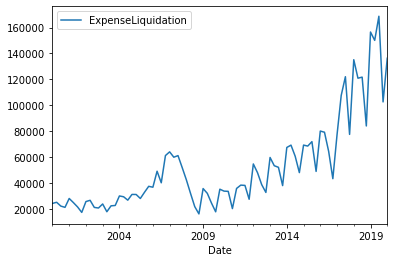

In [11]:
df.plot() # simple plot of the data

## Forecasting

In [15]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))

#### In the next few lines of code, the SARIMAX() function is applied to all combinations of parameters and the model with the lowest AIC is printed.

In [18]:
warnings.filterwarnings("ignore")
aic= []
parameters = []
for param in pdq:
  #for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(df, order=param, enforce_stationarity=True, enforce_invertibility=True)
        results = mod.fit()
        # save results in lists
        aic.append(results.aic)
        parameters.append(param)
        #seasonal_param.append(param_seasonal)
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue
# find lowest aic          
index_min = min(range(len(aic)), key=aic.__getitem__)           

print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))

ARIMA(0, 0, 0) - AIC:2022.5892157513924
ARIMA(0, 0, 1) - AIC:1982.6775673598684
ARIMA(0, 0, 2) - AIC:1965.6264463738762
ARIMA(0, 1, 0) - AIC:1805.0495298740711
ARIMA(0, 1, 1) - AIC:1784.3234441020045
ARIMA(0, 1, 2) - AIC:1790.9339141768044
ARIMA(0, 2, 0) - AIC:1865.1303957078444
ARIMA(0, 2, 1) - AIC:1788.780565977054
ARIMA(0, 2, 2) - AIC:1766.8276513427622
ARIMA(1, 0, 0) - AIC:1831.3563864794005
ARIMA(1, 0, 1) - AIC:1812.053288160238
ARIMA(1, 0, 2) - AIC:1858.2413354183852
ARIMA(1, 1, 0) - AIC:1790.8778825309942
ARIMA(1, 1, 1) - AIC:1786.2839810947319
ARIMA(1, 1, 2) - AIC:1779.2693286213341
ARIMA(1, 2, 0) - AIC:1818.9233113093014
ARIMA(1, 2, 1) - AIC:1775.0740215055193
ARIMA(1, 2, 2) - AIC:1761.9150493166474
ARIMA(2, 0, 0) - AIC:1817.7349549889532
ARIMA(2, 0, 1) - AIC:1806.7093378084714
ARIMA(2, 0, 2) - AIC:1806.3407992428906
ARIMA(2, 1, 0) - AIC:1791.4909843089247
ARIMA(2, 1, 1) - AIC:1793.1079397149742
ARIMA(2, 1, 2) - AIC:1777.9593040878137
ARIMA(2, 2, 0) - AIC:1818.6501339562033
AR

#### The next step is to fit optimal model to our time series.

In [ ]:
model = ARIMA(df, order=parameters[index_min])
model_fit = model.fit(disp=0)
print(model_fit.summary())

#### Finally, we can forecast the next 12 months and visualise the data points thereafter

In [ ]:
model_fit.plot_predict(start=2, end=len(df)+12)
plt.show()